## Lab 6
### Arkadijs Slobodkins, Quentin Morris, Daniel Willborn

In [5]:
import numpy as np
import os
import imageio
from PIL import Image

#data: https://www.kaggle.com/puneet6060/intel-image-classification/version/2

#used the link below to rename all of the images with labels attached for classification task
#https://towardsdatascience.com/image-classification-python-keras-tutorial-kaggle-challenge-45a6332a58b8

classifications = ['buildings','mountain','sea','street','forest','glacier']

#dictionary for names of image classes
naming_dict = {} 
for i in range(len(classifications)):
    naming_dict[classifications[i]] = classifications[i]

#dictionary to add number to label of image    
picType = naming_dict.values()
picType_set = set(picType)
counting_dict = {}
for i in picType_set:
    counting_dict[i] = 0
    
#rename images to 'buildings-#.jpg' 
for img in os.listdir('./buildings'):
    imgName = img.split('.')[0] #converts '0.jpg' to '0'
    label = classifications[0]
    counting_dict[label] += 1
    path = os.path.join('./buildings', img)
    saveName = './labeled_train/' + label + '-' + str(counting_dict[label]) + '.jpg'
    image_data = np.array(Image.open(path))
    imageio.imwrite(saveName, image_data)
    
#rename images to 'mountain-#.jpg' 
for img in os.listdir('./mountain'):
    imgName = img.split('.')[0] #converts '0.jpg' to '0'
    label = classifications[1]
    counting_dict[label] += 1
    path = os.path.join('./mountain', img)
    saveName = './labeled_train/' + label + '-' + str(counting_dict[label]) + '.jpg'
    image_data = np.array(Image.open(path))
    imageio.imwrite(saveName, image_data)
    
#rename images to 'sea-#.jpg' 
for img in os.listdir('./sea'):
    imgName = img.split('.')[0] #converts '0.jpg' to '0'
    label = classifications[2]
    counting_dict[label] += 1
    path = os.path.join('./sea', img)
    saveName = './labeled_train/' + label + '-' + str(counting_dict[label]) + '.jpg'
    image_data = np.array(Image.open(path))
    imageio.imwrite(saveName, image_data)
    
#rename images to 'street-#.jpg' 
for img in os.listdir('./street'):
    imgName = img.split('.')[0] #converts '0.jpg' to '0'
    label = classifications[3]
    counting_dict[label] += 1
    path = os.path.join('./street', img)
    saveName = './labeled_train/' + label + '-' + str(counting_dict[label]) + '.jpg'
    image_data = np.array(Image.open(path))
    imageio.imwrite(saveName, image_data)
    
#rename images to 'forest-#.jpg' 
for img in os.listdir('./forest'):
    imgName = img.split('.')[0] #converts '0.jpg' to '0'
    label = classifications[4]
    counting_dict[label] += 1
    path = os.path.join('./forest', img)
    saveName = './labeled_train/' + label + '-' + str(counting_dict[label]) + '.jpg'
    image_data = np.array(Image.open(path))
    imageio.imwrite(saveName, image_data)
    
#rename images to 'glacier-#.jpg' 
for img in os.listdir('./glacier'):
    imgName = img.split('.')[0] #converts '0.jpg' to '0'
    label = classifications[5]
    counting_dict[label] += 1
    path = os.path.join('./glacier', img)
    saveName = './labeled_train/' + label + '-' + str(counting_dict[label]) + '.jpg'
    image_data = np.array(Image.open(path))
    imageio.imwrite(saveName, image_data)


In [6]:
def label_img(name):
    word_label = name.split('-')[0]
    if word_label == 'buildings' : return np.array([1,0,0,0,0,0])
    elif word_label == 'mountain' : return np.array([0,1,0,0,0,0])
    elif word_label == 'sea' : return np.array([0,0,1,0,0,0])
    elif word_label == 'street' : return np.array([0,0,0,1,0,0])
    elif word_label == 'forest' : return np.array([0,0,0,0,1,0])
    elif word_label == 'glacier' : return np.array([0,0,0,0,0,1])


In [7]:
#load images for use in CNN

#referencing link below for loading/augmentation
#https://towardsdatascience.com/image-classification-python-keras-tutorial-kaggle-challenge-45a6332a58b8
import random

DIR = './labeled_train'
IMG_SIZE = 150
def load_data():
    img_data = []
    count = 0
    for img in os.listdir(DIR):
            label = label_img(img)
            path = os.path.join(DIR, img)
            img = Image.open(path)
            img = img.convert('L')
            img = img.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
            img_data.append([np.asarray(img), label])
            
            # Basic Data Augmentation - Horizontal Flipping
            flip_img = Image.open(path)
            flip_img = flip_img.convert('L')
            flip_img = flip_img.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
            flip_img = np.array(flip_img)
            flip_img = np.fliplr(flip_img)
            img_data.append([flip_img, label])
            random.shuffle(img_data)
            count+=1
    return img_data, count

In [8]:
import matplotlib.pyplot as plt

img_data,count = load_data()
print(count)

14034


In [9]:
import keras
from keras.models import Sequential
from keras.layers import Reshape
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import tensorflow as tf
print(keras.__version__)


from sklearn.model_selection import train_test_split
X = np.array([x[0] for x in img_data]) 
y = np.array([x[1] for x in img_data]) 

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y)

#only use a fraction of our data for training and testing
#X_train=X_train[0:1000,:,:]
#X_test=X_test[0:200,:,:]

y_train=np.asarray(y_train)
y_test=np.asarray(y_test)
#y_train=y_train[0:1000,:]
#y_test=y_test[0:200,:]
print(X_train.shape)
print(y_train.shape)


#X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1]* X_train.shape[2]))
#X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1]*X_test.shape[2]))
#y_train=[np.where(r==1)[0][0] for r in y_train]
#y_test=[np.where(r==1)[0][0] for r in y_test]


Using TensorFlow backend.


2.3.1
(22454, 150, 150)
(22454, 6)


In [10]:
%%time

NUM_CLASSES=6
# make a 3 layer keras MLP
#convert data to mlp expected shape 
X_train_mlp=X_train.reshape(X_train.shape[0],X_train.shape[1]* X_train.shape[2])
X_test_mlp=X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2])

# make a 3 layer keras MLP
mlp = Sequential()
mlp.add( Dense(input_dim=X_train_mlp.shape[1], units=30, 
               activation='relu') )
mlp.add( Dense(units=15, activation='relu') )
mlp.add( Dense(NUM_CLASSES) )
mlp.add( Activation('softmax') )

mlp.compile(loss='mean_squared_error',
              optimizer='rmsprop',
              metrics=['accuracy'])

mlp.fit(X_train_mlp, y_train, 
        batch_size=32, epochs=150, 
        shuffle=True, verbose=0)



Wall time: 7min 39s



Fold  0


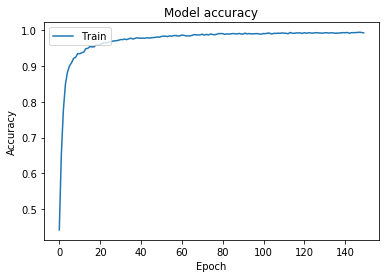

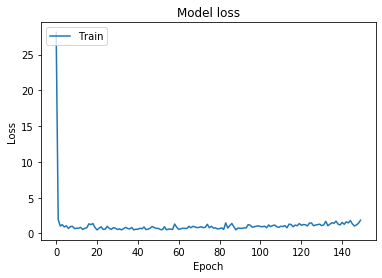


Fold  1


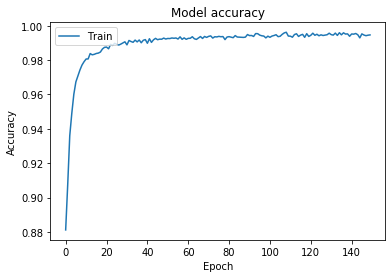

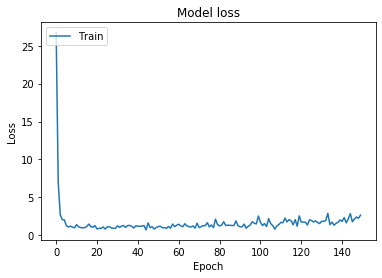


Fold  2


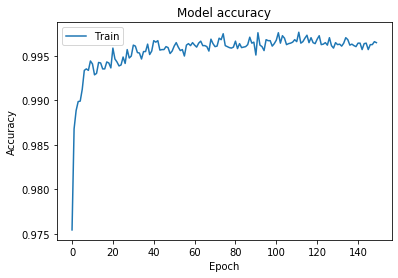

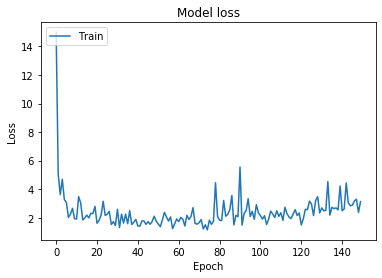


Fold  3


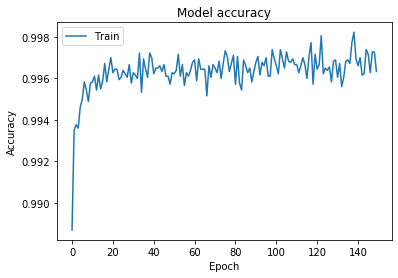

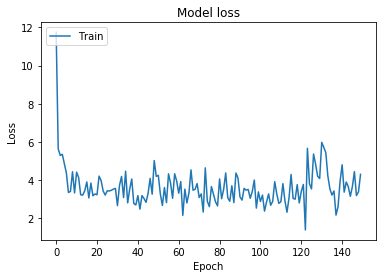


Fold  4


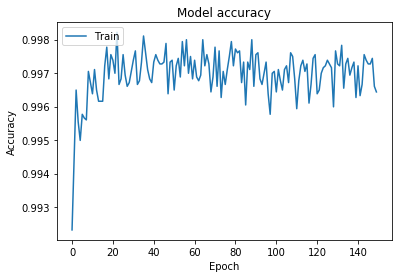

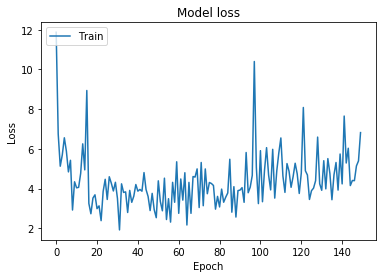

Average accuracy and average standard deviation: 0.904 (0.115)
macro f1 score= 0.6639503941216798
micro f1 score= 0.6636978981118632


In [11]:
from sklearn import metrics as mt
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
#function for dividing data in k folds, compied from algorithm
#https://www.kaggle.com/stefanie04736/simple-keras-model-with-k-fold-cross-validation
def load_data_kfold(k):
    
    folds = list(KFold(n_splits=k, shuffle=True, random_state=1).split(X_train, y_train))   
    return folds, X_train, y_train    


#create 4-layer convolutional neural network     

NUM_CLASSES=6
cnn4 = Sequential()
num_filt_layers = [24, 48]
for num_filters in num_filt_layers:
    cnn4.add( Conv2D(filters=num_filters, 
                    kernel_size=(3,3), 
                    padding='same',data_format="channels_last"))
    #replace relu with leaky relu based on 
    #https://keras.io/layers/advanced-activations/
    cnn4.add(keras.layers.LeakyReLU(alpha=0.1))   
    cnn4.add( MaxPooling2D(pool_size=(2, 2), data_format="channels_last"))
    
# add one layer on flattened output
cnn4.add( Flatten() )
cnn4.add( Dense(100) )
cnn4.add(keras.layers.LeakyReLU(alpha=0.1))
cnn4.add( Dense(NUM_CLASSES) )
cnn4.add( Activation('softmax') )

cnn4.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


#implementation of cross validation below(including j loop and some lines inside the loop)is taken from
#https://www.kaggle.com/stefanie04736/simple-keras-model-with-k-fold-cross-validation
#and modified for our data

folds = 5
#accuracy list and cv_scores inside j loop are used  as in
#https://medium.com/@navmcgill/k-fold-cross-validation-in-keras-convolutional-neural-networks-835bed559d04
#under paragraph  10-fold cross-validation
accuracy = list()
cv_scores=list()
folds, X_train, y_train = load_data_kfold(folds)

for j, (train_idx, val_idx) in enumerate(folds):
    
    print('\nFold ',j)
    X_train_val = X_train[train_idx,:,:]
    y_train_val = y_train[train_idx,:]
    X_test_val = X_train[val_idx,:,:]
    y_test_val= y_train[val_idx,:]
    
    X_train2D=X_train_val.reshape(X_train_val.shape[0],150,150,1)
    X_test2D=X_test_val.reshape(X_test_val.shape[0],150,150,1)
      
     
    model_history=cnn4.fit(X_train2D, y_train_val, 
        batch_size=32, epochs=150, 
        shuffle=True, verbose=0)
   
    y_score=cnn4.predict(X_test2D)
    y_hat = np.argmax(y_score,axis=1)
    y_testCat = np.argmax(y_test_val, axis=1)
    accuracy=(mt.accuracy_score(y_testCat,y_hat))
    cv_scores.append(accuracy)
  
    #visualization below is copied directly from
    #https://keras.io/visualization/
    # Plot training & validation accuracy values
    plt.plot(model_history.history['accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(model_history.history['loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

print('Average accuracy and average standard deviation: %.3f (%.3f)' % (np.mean(cv_scores), np.std(cv_scores)))

from sklearn.metrics import f1_score

X_train2D=X_train.reshape(X_train.shape[0],150,150,1)
X_test2D=X_test.reshape(X_test.shape[0],150,150,1)

y_score=cnn4.predict(X_test2D)
y_hat = np.argmax(y_score,axis=1)
y_testCat = np.argmax(y_test, axis=1)

print('macro f1 score=',f1_score(y_hat, y_testCat, average='macro'))
print('micro f1 score=', f1_score(y_hat, y_testCat, average='micro'))




The chosen dataset can have multiple purposes, such as being used as additional analysis for datasets with more categories and greater complexity, pretraining for another model, or simply used for prediction of a main feature in the background. 

Evalutation metrics: The classification task is to predict one out of 6 possible categories. Our main purpose is to build a classifier that would generalize well on images that belong to one of these 6 categories on any distribution among classes. That is the reason we chose accuracy as our main evaluation metric. 
However, if our task was to predict whether picture belongs to one of 6 categories, while given other categories of images, recall or f1 would be of more significance. Therefore, both micro and macro f1 score were calculated as well. Observing the differences between micro and macro f1 allows to observe if some of the classes perform significantly worse/better than others. 

Cross validation: Testing data is expected to have either similar distribution to training set, or 
dramatically different. That is why Kfold validation is used instead of stratified Kfold. Cross validation
sets are randomly distributed among classes, which is what is expected in test set. 

Performance/analysis: The following dataset contains 150x150 images, which is a lot of computational work and information to capture. Time constraints did not allow to run multiple tests on large data to tune the parameters, such as number of filters, number of epochs, number of kernels, dropout parameter, adding additional layers, optimization technique(adadelta, rmsprop, adam), etc. Instead, such testing was done on smaller datasets.
Smaller kernel sizes and increased number of filters proved to be more time consuming but in general improve accuracy. There was no significant difference in using rmsprop, adam, or adadelta, though rmsprop seems to learn 
slightly faster. Adam and adadelta are capable of learning longer, but they would work better if size of data was greater compared to size of images. The more complex is the neural network, the more important becomes dropout. 
The objective of varying parameters of a neural network was to obtain good generalization rather than fitting the data perfectly. On the other hand, there are only 6 categries with seemingly significantly different features, hence data should be less susceptible to overfitting, given sufficient amount of data.

Regular MLP always predicted only 1 category for all tests. This demonstrates that classifying images is
relatively complex task and more complex networks are needed. We used cnn4 from class example, but relu was replaced with leaku relu in hope to obtain better learning. In small experiments leaky relu performed slightly better then relu. Cross validation of cnn4 gives average accuracy of 0.89, but only 0.53 on test set. It could be 
possible due to small amount of data trained and tested, as well as overfitting. No dropout was used for cnn4.
ROC curve shows that 'buildings' and 'glacier' perform the worst, whereas 'mountain','sea','street','forest' perform quite well. The latter are representatives of overall landscape and thus all 150x150 features, but buldings and glacier have the most important features at one particular location of an image. 

The second cnn is alexnet with a few layers added for deeper learning. It performs worse when amount of data is small, and slighlty worse when size of data is increased. Since it is a more complex model than cnn4, it is designed to work better for larger classification tasks. Adding 3 additional layers might have been inappropriate due to specifics of this network's architecture. 



In [12]:
%%time 
NUM_CLASSES=6
from sklearn import metrics as mt


from keras.preprocessing.image import ImageDataGenerator
img_wh = 150

datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=5, # used, Int. Degree range for random rotations.
    width_shift_range=0.1, # used, Float (fraction of total width). Range for random horizontal shifts.
    height_shift_range=0.1, # used,  Float (fraction of total height). Range for random vertical shifts.
    shear_range=0., # Float. Shear Intensity (Shear angle in counter-clockwise direction as radians)
    zoom_range=0.,
    channel_shift_range=0.,
    fill_mode='nearest',
    cval=0.,
    horizontal_flip=True,
    vertical_flip=False,
    rescale=None)

X_train2D=X_train.reshape(X_train.shape[0],150,150,1)
X_test2D=X_test.reshape(X_test.shape[0],150,150,1)
NUM_CLASSES=6



cnn = Sequential()

# let's start with an AlexNet style convolutional phase with additional layers and reduced number of filter
cnn.add(Conv2D(filters=32,
                input_shape = (img_wh,img_wh,1),
                kernel_size=(3,3), 
                padding='same', 
                activation='relu', data_format="channels_last")) # more compact syntax



# no max pool before next conv layer!!
cnn.add(Conv2D(filters=32,
                kernel_size=(3,3), 
                padding='same', 
                activation='relu')) # more compact syntax
#add additional layers

cnn.add(Conv2D(filters=64,
                kernel_size=(3,3), 
                padding='same', 
                activation='relu')) # more compact syntax

cnn.add(Conv2D(filters=64,
                kernel_size=(3,3), 
                padding='same', 
                activation='relu')) # more compact syntax


cnn.add(Conv2D(filters=32,
                kernel_size=(3,3), 
                padding='same', 
                activation='relu')) # more compact syntax
cnn.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_last"))




    

# add one layer on flattened output
cnn.add(Dropout(0.25)) # add some dropout for regularization after conv layers
cnn.add(Flatten())
cnn.add(Dense(128, activation='relu'))
cnn.add(Dropout(0.5)) # add some dropout for regularization, again!
cnn.add(Dense(NUM_CLASSES, activation='softmax'))



# Let's train the model 
cnn.compile(loss='categorical_crossentropy', # 'categorical_crossentropy' 'mean_squared_error'
              optimizer='rmsprop', # 'adadelta' 'rmsprop'
              metrics=['accuracy'])


# the flow method yields batches of images indefinitely, with the given transformations
cnn.fit_generator(datagen.flow(X_train2D, y_train, batch_size=2), 
                   steps_per_epoch=150, # how many generators to go through per epoch
                   epochs=6, verbose=1,
                   validation_data=(X_test2D,y_test)
                  )

from sklearn.metrics import f1_score



yhat_cnn = np.argmax(cnn.predict(X_test2D), axis=1)
y_testCat = np.argmax(y_test, axis=1)
acc_cnn = mt.accuracy_score(y_testCat,yhat_cnn)
print(acc_cnn) 

y_score=cnn.predict(X_test2D)
y_hat = np.argmax(y_score,axis=1)
y_testCat = np.argmax(y_test, axis=1)
print('macro f1 score=',f1_score(y_hat, y_testCat, average='macro'))
print('micro f1 score=', f1_score(y_hat, y_testCat, average='micro'))




Epoch 1/6
150/150 [==============================] - 15s 97ms/step - loss: 12.5198 - accuracy: 0.1867 - val_loss: 1.7936 - val_accuracy: 0.1516
Epoch 2/6
150/150 [==============================] - 13s 89ms/step - loss: 2.6064 - accuracy: 0.2233 - val_loss: 1.7403 - val_accuracy: 0.2667
Epoch 3/6
150/150 [==============================] - 13s 90ms/step - loss: 1.7786 - accuracy: 0.2667 - val_loss: 1.6136 - val_accuracy: 0.3422
Epoch 4/6
150/150 [==============================] - 13s 90ms/step - loss: 1.8376 - accuracy: 0.3400 - val_loss: 1.4683 - val_accuracy: 0.3682
Epoch 5/6
150/150 [==============================] - 14s 90ms/step - loss: 1.5377 - accuracy: 0.3167 - val_loss: 1.4375 - val_accuracy: 0.3493
Epoch 6/6
150/150 [==============================] - 13s 89ms/step - loss: 1.5757 - accuracy: 0.3067 - val_loss: 1.4719 - val_accuracy: 0.3425
0.3425365158532241
macro f1 score= 0.2522005795003884
micro f1 score= 0.3425365158532241
Wall time: 1min 35s


confusion matrix for alexnet type cnn and cnn4 vs MLP


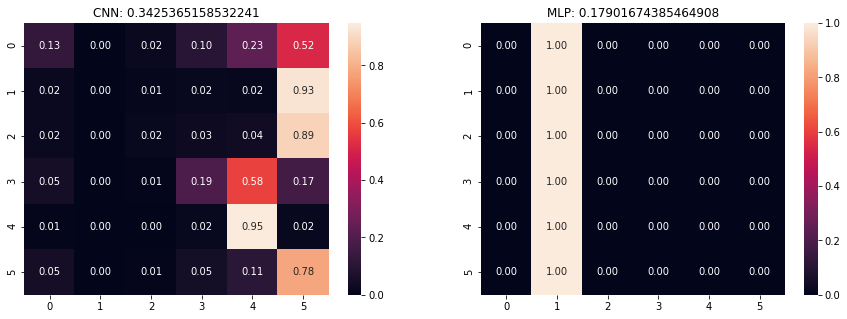

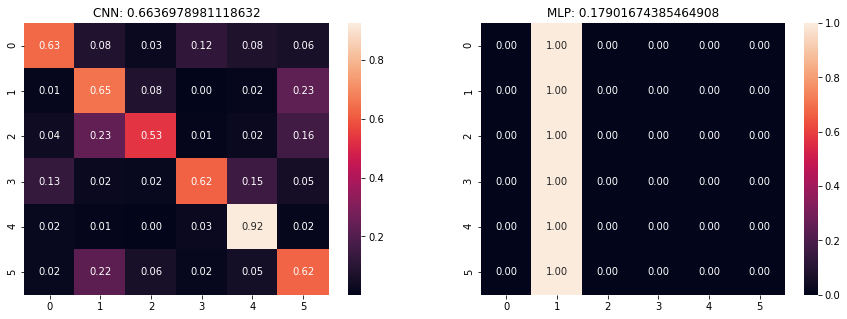

In [13]:
from sklearn import metrics as mt
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

def compare_mlp_cnn(cnn, mlp, X_test, y_test):
    plt.figure(figsize=(15,5))
    if cnn is not None:

        X_test2D=X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)
        yhat_cnn = np.argmax(cnn.predict(X_test2D), axis=1)
        y_testCat = np.argmax(y_test, axis=1)
        acc_cnn = mt.accuracy_score(y_testCat,yhat_cnn)
        
        
        plt.subplot(1,2,1)
        cm = mt.confusion_matrix(y_testCat,yhat_cnn)
        cm = cm/np.sum(cm,axis=1)[:,np.newaxis]
        sns.heatmap(cm, annot=True, fmt='.2f')
        plt.title('CNN: '+str(acc_cnn))
    
    if mlp is not None:
        #y_test = np.argmax(y_test, axis=1)
        X_test_mlp=X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2])
        yhat_mlp = np.argmax(mlp.predict(X_test_mlp), axis=1)
       # y_test = np.argmax(y_test, axis=1)
        y_testCat = np.argmax(y_test, axis=1)
        acc_mlp = mt.accuracy_score(y_testCat,yhat_mlp)
        plt.subplot(1,2,2)
        cm = mt.confusion_matrix(y_testCat,yhat_mlp)
        cm = cm/np.sum(cm,axis=1)[:,np.newaxis]
        sns.heatmap(cm,annot=True, fmt='.2f')
        plt.title('MLP: '+str(acc_mlp))
print('confusion matrix for alexnet type cnn and cnn4 vs MLP')
compare_mlp_cnn(cnn,mlp, X_test,y_test)  
compare_mlp_cnn(cnn4,mlp, X_test, y_test)
        
        

plot ROC for Alexnet type cnn vs mlp and ROC for cnn4 vs mlp
(22454, 150, 150, 1)
Accuracy of cnn= 0.3425365158532241
Accuracy of mlp= 0.17901674385464908


R:\Anaconda3\envs\myGPU\lib\site-packages\ipykernel_launcher.py:62: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


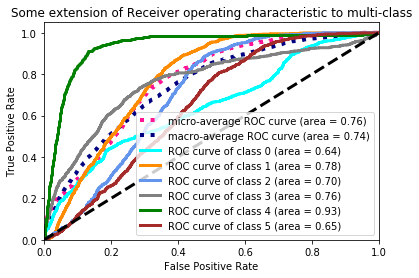

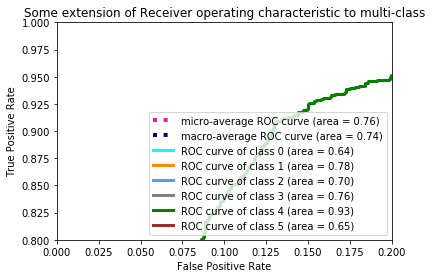

R:\Anaconda3\envs\myGPU\lib\site-packages\ipykernel_launcher.py:62: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


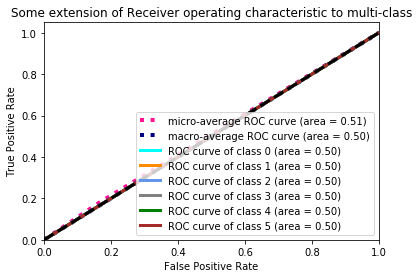

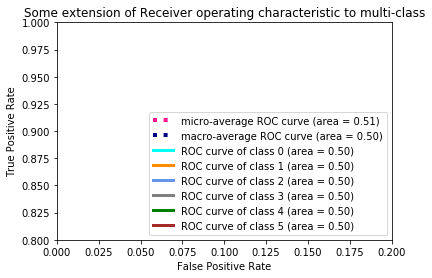

Accuracy of cnn= 0.6636978981118632
Accuracy of mlp= 0.17901674385464908


R:\Anaconda3\envs\myGPU\lib\site-packages\ipykernel_launcher.py:178: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


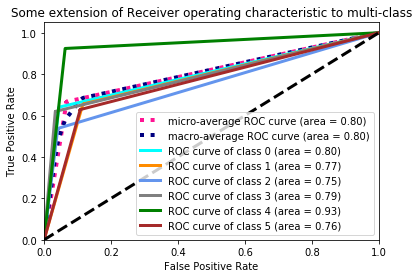

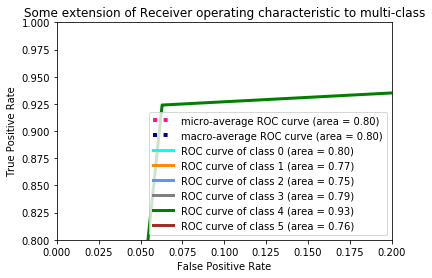

R:\Anaconda3\envs\myGPU\lib\site-packages\ipykernel_launcher.py:178: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


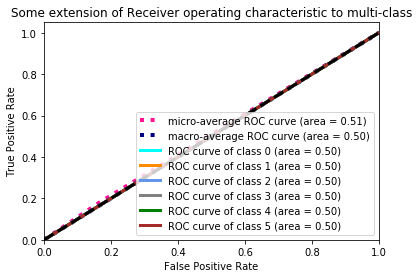

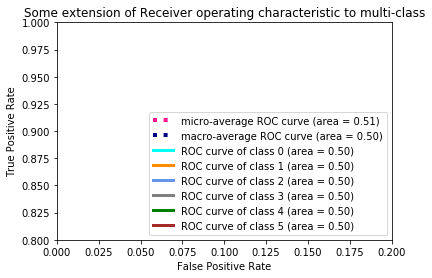

In [14]:
# all the code in this cell copied and slightly modified from  from https://www.dlology.com/blog/simple-guide-on-how-to-generate-roc-plot-for-keras-classifier/ under 
# section ROC, AUC for a categorical classifier

#plot ROC for Alexnet type cnn vs mlp
#and ROC for cnn4 vs mlp

print('plot ROC for Alexnet type cnn vs mlp and ROC for cnn4 vs mlp')
X_train2D=X_train.reshape(X_train.shape[0],150,150,1)
X_test2D=X_test.reshape(X_test.shape[0],150,150,1)


print(X_train2D.shape)
      
y_score=cnn.predict(X_test2D)
y_hat = np.argmax(y_score,axis=1)
y_testCat = np.argmax(y_test, axis=1)
acc_cnn = mt.accuracy_score(y_testCat,y_hat)
print('Accuracy of cnn=',acc_cnn)

y_score_mlp=mlp.predict(X_test_mlp)
y_hat_mlp = np.argmax(y_score_mlp,axis=1)
y_testCat = np.argmax(y_test, axis=1)
acc_mlp = mt.accuracy_score(y_testCat,y_hat_mlp)
print('Accuracy of mlp=',acc_mlp)


from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc

# Plot linewidth.
lw = 3
n_classes=6


for i in range(2):
    if(i==1):
        y_score=y_score_mlp
        y_hat=y_hat_mlp

# Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # Compute macro-average ROC curve and ROC area

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure(1)
    plt.plot(fpr["micro"], tpr["micro"],
            label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

    colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'grey','green','brown'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Some extension of Receiver operating characteristic to multi-class')
    plt.legend(loc="lower right")
    plt.show()


    # Zoom in view of the upper left corner.
    plt.figure(2)
    plt.xlim(0, 0.2)
    plt.ylim(0.8, 1)
    plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

    colors = cycle(['aqua', 'darkorange', 'cornflowerblue',
                   'grey','green','brown'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Some extension of Receiver operating characteristic to multi-class')
    plt.legend(loc="lower right")
    plt.show()
    
    
    
#plot ROC for  cnn4 vs mlp
y_score=cnn4.predict(X_test2D)
y_hat = np.argmax(y_score,axis=1)
y_testCat = np.argmax(y_test, axis=1)
acc_cnn = mt.accuracy_score(y_testCat,y_hat)
print('Accuracy of cnn=',acc_cnn)

y_score_mlp=mlp.predict(X_test_mlp)
y_hat_mlp = np.argmax(y_score_mlp,axis=1)
y_testCat = np.argmax(y_test, axis=1)
acc_mlp = mt.accuracy_score(y_testCat,y_hat_mlp)
print('Accuracy of mlp=',acc_mlp)


from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc

# Plot linewidth.
lw = 3
n_classes=6


for i in range(2):
    if(i==1):
        y_score=y_score_mlp
        y_hat=y_hat_mlp

# Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # Compute macro-average ROC curve and ROC area

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure(1)
    plt.plot(fpr["micro"], tpr["micro"],
            label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

    colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'grey','green','brown'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Some extension of Receiver operating characteristic to multi-class')
    plt.legend(loc="lower right")
    plt.show()


    # Zoom in view of the upper left corner.
    plt.figure(2)
    plt.xlim(0, 0.2)
    plt.ylim(0.8, 1)
    plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

    colors = cycle(['aqua', 'darkorange', 'cornflowerblue',
                   'grey','green','brown'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Some extension of Receiver operating characteristic to multi-class')
    plt.legend(loc="lower right")
    plt.show()

In the ROC plots above, it is obvious that the CNN outperforms the standard MLP. The ROC curves for the CNNs have areas under the curve that are relatively high for each class predicted, with their areas being near 1 for most classes while one class is consistenly lower than the others. The MLP ROC curves only have an area under the curve of 0.5 for all classes predicted. This tells us that the MLP does not do an effective job of learning the characterists of each input class and makes poor predictions for the outputs of the classes on the set of test data. 

Below are tests for both cnn and cnn4 for training data of size 4000 and test data of size 800. All the code above 
uses 1000 for training and 200 for testing. Below, after training was completed in a few hours, it turned out that y_hat was mistyped as yhat, which is fixed in the cell that follows for results. 

In [15]:

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y)

#only use a fraction of our data for training and testing
#X_train=X_train[0:4000,:,:]
#X_test=X_test[0:800,:,:]

y_train=np.asarray(y_train)
y_test=np.asarray(y_test)
#y_train=y_train[0:4000,:]
#y_test=y_test[0:800,:]
print(X_train.shape)
print(y_train.shape)

X_train2D=X_train.reshape(X_train.shape[0],150,150,1)
X_test2D=X_test.reshape(X_test.shape[0],150,150,1)



# the flow method yields batches of images indefinitely, with the given transformations
cnn.fit_generator(datagen.flow(X_train2D, y_train, batch_size=2), 
                   steps_per_epoch=80, # how many generators to go through per epoch
                   epochs=6, verbose=1,
                   validation_data=(X_test2D,y_test)
                  )

cnn4.fit(X_train2D, y_train, 
        batch_size=32, epochs=150, 
        shuffle=True, verbose=0)

from sklearn.metrics import f1_score



yhat_cnn = np.argmax(cnn.predict(X_test2D), axis=1)
y_testCat = np.argmax(y_test, axis=1)
acc_cnn = mt.accuracy_score(y_testCat,yhat_cnn)
print(acc_cnn) 

y_score=cnn.predict(X_test2D)
y_hat = np.argmax(y_score,axis=1)
y_testCat = np.argmax(y_test, axis=1)
print('macro f1 score=',f1_score(y_hat, y_testCat, average='macro'))
print('micro f1 score=', f1_score(y_hat, y_testCat, average='micro'))
acc_cnn = mt.accuracy_score(y_testCat,y_hat)
print(acc_cnn) 


y_score=cnn4.predict(X_test2D)
y_hat = np.argmax(y_score,axis=1)
y_testCat = np.argmax(y_test, axis=1)
print('macro f1 score=',f1_score(y_hat, y_testCat, average='macro'))
print('micro f1 score=', f1_score(y_hat, y_testCat, average='micro'))
acc_cnn = mt.accuracy_score(y_testCat,y_hat)
print(acc_cnn)





(22454, 150, 150)
(22454, 6)
Epoch 1/6
80/80 [==============================] - 12s 152ms/step - loss: 1.6053 - accuracy: 0.2688 - val_loss: 1.4504 - val_accuracy: 0.3554
Epoch 2/6
80/80 [==============================] - 12s 152ms/step - loss: 1.4862 - accuracy: 0.4187 - val_loss: 1.5162 - val_accuracy: 0.3568
Epoch 3/6
80/80 [==============================] - 12s 152ms/step - loss: 1.4472 - accuracy: 0.3938 - val_loss: 1.4214 - val_accuracy: 0.4031
Epoch 4/6
80/80 [==============================] - 12s 152ms/step - loss: 1.6107 - accuracy: 0.3375 - val_loss: 1.4171 - val_accuracy: 0.3888
Epoch 5/6
80/80 [==============================] - 12s 152ms/step - loss: 1.5213 - accuracy: 0.4250 - val_loss: 1.7424 - val_accuracy: 0.2380
Epoch 6/6
80/80 [==============================] - 12s 153ms/step - loss: 1.4793 - accuracy: 0.4313 - val_loss: 1.5114 - val_accuracy: 0.3696
0.3696116850730317
macro f1 score= 0.2511439553920016
micro f1 score= 0.3696116850730317
0.3696116850730317
macro f1 sc

In [16]:
y_score=cnn.predict(X_test2D)
y_hat = np.argmax(y_score,axis=1)
y_testCat = np.argmax(y_test, axis=1)
print('macro f1 score=',f1_score(y_hat, y_testCat, average='macro'))
print('micro f1 score=', f1_score(y_hat, y_testCat, average='micro'))
acc_cnn = mt.accuracy_score(y_testCat,y_hat)
print(acc_cnn) 


y_score=cnn4.predict(X_test2D)
y_hat = np.argmax(y_score,axis=1)
y_testCat = np.argmax(y_test, axis=1)
print('macro f1 score=',f1_score(y_hat, y_testCat, average='macro'))
print('micro f1 score=', f1_score(y_hat, y_testCat, average='micro'))
acc_cnn = mt.accuracy_score(y_testCat,y_hat)
print(acc_cnn)


macro f1 score= 0.2511439553920016
micro f1 score= 0.3696116850730317
0.3696116850730317
macro f1 score= 0.9163567419933055
micro f1 score= 0.9157463484146776
0.9157463484146776


Alex net type cnn gives 0.53 accuracy in the cell above, cnn4 gives about 0.59. 
The remaining code below uses resnet type network from class. Large batch sizes are used for 
extended learning. Number of filters is doubled in each layer. This cnn contains significantly more layers and was expected to overfit the data. The model runs in a shorter amount of time than expected, hence we decided to use it as our third network. It is tested using training set of size 1000 and 10000.  It turned out that performance is similar to cnn4. 
The conclusion is that even simple classification tasks can take significant amount of time to select the most appropriate network and obtain a good performance. cnn4 turned out to work best for our classification task.


In [17]:
%%time

from sklearn import metrics as mt
from sklearn.metrics import f1_score
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y)

#only use a fraction of our data for training and testing
#X_train=X_train[0:1000,:,:]
#X_test=X_test[0:200,:,:]


from keras.preprocessing.image import ImageDataGenerator
img_wh = 150
NUM_CLASSES=6

y_train=np.asarray(y_train)
y_test=np.asarray(y_test)
#y_train=y_train[0:1000,:]
#y_test=y_test[0:200,:]
print(X_train.shape)
print(y_train.shape)

# now lets use the LeNet architecture with batch norm
# We will also use ReLU where approriate and drop out 
from keras.layers.normalization import BatchNormalization
from keras.layers import Add
from keras.layers import average, concatenate
from keras.models import Input, Model
from keras.regularizers import l2 
from keras.callbacks import EarlyStopping

l2_lambda = 0.000001

input_holder = Input(shape=(img_wh, img_wh, 1))

# start with a conv layer
x = Conv2D(filters=64,
               input_shape = (img_wh,img_wh,1),
               kernel_size=(3,3),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu', 
               data_format="channels_last")(input_holder)

x = MaxPooling2D(pool_size=(2, 2), data_format="channels_last")(x)



x = MaxPooling2D(pool_size=(2, 2), data_format="channels_last")(x)

x = Conv2D(filters=64,
               kernel_size=(3,3),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu', 
               data_format="channels_last")(x)

x_split = MaxPooling2D(pool_size=(2, 2), data_format="channels_last")(x)

x = Conv2D(filters=128,
               kernel_size=(1,1),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu', 
               data_format="channels_last")(x_split)

x = Conv2D(filters=128,
               kernel_size=(3,3),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu', 
               data_format="channels_last")(x)



x = Conv2D(filters=64,
               kernel_size=(1,1),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu', 
               data_format="channels_last")(x)

# now add back in the split layer, x_split (residual added in)
x = Add()([x, x_split])
x = Activation("relu")(x)

x = MaxPooling2D(pool_size=(2, 2), data_format="channels_last")(x)

x = Flatten()(x)
x = Dropout(0.25)(x) 
x = Dense(256)(x)
x = Activation("relu")(x)
x = Dropout(0.5)(x)
x = Dense(NUM_CLASSES)(x)
x = Activation('softmax')(x)

resnet = Model(inputs=input_holder,outputs=x)

resnet.summary()



resnet.compile(loss='categorical_crossentropy', # 'categorical_crossentropy' 'mean_squared_error'
                optimizer='adam', # 'adadelta' 'rmsprop'
 metrics=['accuracy'])

X_test2D=X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)
X_train2D=X_train.reshape(X_train.shape[0],X_test.shape[1],X_test.shape[2],1)

resnet.fit(X_train2D, y_train, batch_size=200, 
                      epochs=50, verbose=1,
                      validation_data=(X_test2D,y_test),
                      callbacks=[EarlyStopping(monitor='val_loss', patience=4)]
                     )



yhat_cnn = np.argmax(resnet.predict(X_test2D), axis=1)
y_testCat = np.argmax(y_test, axis=1)
acc_cnn = mt.accuracy_score(y_testCat,yhat_cnn)
 
print('accuracy=',acc_cnn)
y_score=resnet.predict(X_test2D)
y_hat = np.argmax(y_score,axis=1)
y_testCat = np.argmax(y_test, axis=1)
print('macro f1 score=',f1_score(y_hat, y_testCat, average='macro'))
print('micro f1 score=', f1_score(y_hat, y_testCat, average='micro'))

       

(22454, 150, 150)
(22454, 6)
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 150, 150, 1)  0                                            
__________________________________________________________________________________________________
conv2d_8 (Conv2D)               (None, 150, 150, 64) 640         input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_4 (MaxPooling2D)  (None, 75, 75, 64)   0           conv2d_8[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_5 (MaxPooling2D)  (None, 37, 37, 64)   0           max_pooling2d_4[0][0]            
_______________________________________________________________

In [18]:
%%time

from sklearn import metrics as mt
from sklearn.metrics import f1_score
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y)

#only use a fraction of our data for training and testing
#X_train=X_train[0:10000,:,:]
#X_test=X_test[0:2000,:,:]


from keras.preprocessing.image import ImageDataGenerator
img_wh = 150
NUM_CLASSES=6

y_train=np.asarray(y_train)
y_test=np.asarray(y_test)
#y_train=y_train[0:10000,:]
#y_test=y_test[0:2000,:]
print(X_train.shape)
print(y_train.shape)

# now lets use the LeNet architecture with batch norm
# We will also use ReLU where approriate and drop out 
from keras.layers.normalization import BatchNormalization
from keras.layers import Add
from keras.layers import average, concatenate
from keras.models import Input, Model
from keras.regularizers import l2 
from keras.callbacks import EarlyStopping

l2_lambda = 0.000001

input_holder = Input(shape=(img_wh, img_wh, 1))

# start with a conv layer
x = Conv2D(filters=64,
               input_shape = (img_wh,img_wh,1),
               kernel_size=(3,3),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu', 
               data_format="channels_last")(input_holder)

x = MaxPooling2D(pool_size=(2, 2), data_format="channels_last")(x)



x = MaxPooling2D(pool_size=(2, 2), data_format="channels_last")(x)

x = Conv2D(filters=64,
               kernel_size=(3,3),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu', 
               data_format="channels_last")(x)

x_split = MaxPooling2D(pool_size=(2, 2), data_format="channels_last")(x)

x = Conv2D(filters=128,
               kernel_size=(1,1),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu', 
               data_format="channels_last")(x_split)

x = Conv2D(filters=128,
               kernel_size=(3,3),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu', 
               data_format="channels_last")(x)



x = Conv2D(filters=64,
               kernel_size=(1,1),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu', 
               data_format="channels_last")(x)

# now add back in the split layer, x_split (residual added in)
x = Add()([x, x_split])
x = Activation("relu")(x)

x = MaxPooling2D(pool_size=(2, 2), data_format="channels_last")(x)

x = Flatten()(x)
x = Dropout(0.25)(x) 
x = Dense(256)(x)
x = Activation("relu")(x)
x = Dropout(0.5)(x)
x = Dense(NUM_CLASSES)(x)
x = Activation('softmax')(x)

resnet = Model(inputs=input_holder,outputs=x)

resnet.summary()



resnet.compile(loss='categorical_crossentropy', # 'categorical_crossentropy' 'mean_squared_error'
                optimizer='adam', # 'adadelta' 'rmsprop'
 metrics=['accuracy'])

X_test2D=X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)
X_train2D=X_train.reshape(X_train.shape[0],X_test.shape[1],X_test.shape[2],1)

resnet.fit(X_train2D, y_train, batch_size=200, 
                      epochs=50, verbose=1,
                      validation_data=(X_test2D,y_test),
                      callbacks=[EarlyStopping(monitor='val_loss', patience=4)]
                     )



yhat_cnn = np.argmax(resnet.predict(X_test2D), axis=1)
y_testCat = np.argmax(y_test, axis=1)
acc_cnn = mt.accuracy_score(y_testCat,yhat_cnn)
 
print('accuracy=',acc_cnn)
y_score=resnet.predict(X_test2D)
y_hat = np.argmax(y_score,axis=1)
y_testCat = np.argmax(y_test, axis=1)
print('macro f1 score=',f1_score(y_hat, y_testCat, average='macro'))
print('micro f1 score=', f1_score(y_hat, y_testCat, average='micro'))

       

(22454, 150, 150)
(22454, 6)
Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 150, 150, 1)  0                                            
__________________________________________________________________________________________________
conv2d_13 (Conv2D)              (None, 150, 150, 64) 640         input_2[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_8 (MaxPooling2D)  (None, 75, 75, 64)   0           conv2d_13[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_9 (MaxPooling2D)  (None, 37, 37, 64)   0           max_pooling2d_8[0][0]            
_______________________________________________________________